# Learn about Keras and Neural Network

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

![](../data/banknotes.png)

### Loading some training set data (지폐분류기)

In [2]:
df = pd.read_csv('data/banknotes.csv')

In [3]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [8]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

### Logistic Regression Model

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [11]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [12]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

Epoch 1/10
960/960 [==============================] - 0s - loss: 0.6753 - acc: 0.6021     
Epoch 2/10
960/960 [==============================] - 0s - loss: 0.6342 - acc: 0.6281     
Epoch 3/10
960/960 [==============================] - 0s - loss: 0.5981 - acc: 0.6510     
Epoch 4/10
960/960 [==============================] - 0s - loss: 0.5664 - acc: 0.6625     
Epoch 5/10
960/960 [==============================] - 0s - loss: 0.5387 - acc: 0.6802     
Epoch 6/10
960/960 [==============================] - 0s - loss: 0.5144 - acc: 0.7052     
Epoch 7/10
960/960 [==============================] - 0s - loss: 0.4932 - acc: 0.7354     
Epoch 8/10
960/960 [==============================] - 0s - loss: 0.4744 - acc: 0.7677     
Epoch 9/10
960/960 [==============================] - 0s - loss: 0.4579 - acc: 0.7854     
Epoch 10/10
 32/412 [=>............................] - ETA: 0s

In [13]:
historydf = pd.DataFrame(history.history, index=history.epoch)

Text(0.5,1,'Test accuracy: 79.1 %')

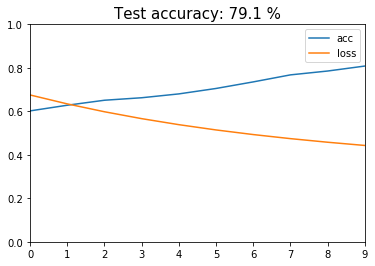

In [14]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

In [15]:
result
# loss and then acc

[0.45287452247536297, 0.79126213476495832]

In [16]:
history = model.fit(X, y, validation_split=0.3)

Train on 960 samples, validate on 412 samples
Epoch 1/10
960/960 [==============================] - 0s - loss: 0.4212 - acc: 0.8417 - val_loss: 0.4681 - val_acc: 0.7670
Epoch 2/10
960/960 [==============================] - 0s - loss: 0.4031 - acc: 0.8573 - val_loss: 0.4713 - val_acc: 0.7621
Epoch 3/10
960/960 [==============================] - 0s - loss: 0.3872 - acc: 0.8646 - val_loss: 0.4742 - val_acc: 0.7549
Epoch 4/10
960/960 [==============================] - 0s - loss: 0.3729 - acc: 0.8677 - val_loss: 0.4770 - val_acc: 0.7524
Epoch 5/10
960/960 [==============================] - 0s - loss: 0.3602 - acc: 0.8719 - val_loss: 0.4796 - val_acc: 0.7500
Epoch 6/10
960/960 [==============================] - 0s - loss: 0.3488 - acc: 0.8781 - val_loss: 0.4820 - val_acc: 0.7451
Epoch 7/10
960/960 [==============================] - 0s - loss: 0.3385 - acc: 0.8781 - val_loss: 0.4841 - val_acc: 0.7476
Epoch 8/10
960/960 [==============================] - 0s - loss: 0.3291 - acc: 0.8781 - val_l

### Learning Rates

In [17]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [18]:
historydf = pd.concat(dflist, axis=1)

In [19]:
historydf

,acc,loss,acc,loss,acc,loss,acc,loss
0,0.461458,0.890932,0.806250,0.482790,0.794792,0.469094,0.857292,0.355666
1,0.557292,0.721001,0.911458,0.337226,0.912500,0.285969,0.964583,0.135466
2,0.657292,0.616305,0.929167,0.277751,0.932292,0.229161,0.975000,0.098701
3,0.762500,0.549345,0.941667,0.240780,0.942708,0.193307,0.977083,0.081973
4,0.787500,0.503380,0.947917,0.214527,0.951042,0.168727,0.978125,0.072595
5,0.806250,0.469568,0.954167,0.194676,0.958333,0.150646,0.978125,0.066185
6,0.815625,0.442964,0.956250,0.179041,0.962500,0.136898,0.980208,0.061534
7,0.821875,0.421099,0.956250,0.166415,0.968750,0.126101,0.981250,0.057930
8,0.830208,0.402438,0.962500,0.155983,0.969792,0.117486,0.981250,0.055253
9,0.837500,0.386124,0.965625,0.147198,0.969792,0.110446,0.981250,0.052847


In [20]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [21]:
historydf

learning_rate      0.01                0.05                0.10            \
metric              acc      loss       acc      loss       acc      loss   
0              0.461458  0.890932  0.806250  0.482790  0.794792  0.469094   
1              0.557292  0.721001  0.911458  0.337226  0.912500  0.285969   
2              0.657292  0.616305  0.929167  0.277751  0.932292  0.229161   
3              0.762500  0.549345  0.941667  0.240780  0.942708  0.193307   
4              0.787500  0.503380  0.947917  0.214527  0.951042  0.168727   
5              0.806250  0.469568  0.954167  0.194676  0.958333  0.150646   
6              0.815625  0.442964  0.956250  0.179041  0.962500  0.136898   
7              0.821875  0.421099  0.956250  0.166415  0.968750  0.126101   
8              0.830208  0.402438  0.962500  0.155983  0.969792  0.117486   
9              0.837500  0.386124  0.965625  0.147198  0.969792  0.110446   

learning_rate      0.50            
metric              acc      loss  
0              0.857292  0.355666  
1              0.964583  0.135466  
2              0.975000  0.098701  
3              0.977083  0.081973  
4              0.978125  0.072595  
5              0.978125  0.066185  
6              0.980208  0.061534  
7              0.981250  0.057930  
8              0.981250  0.055253  
9              0.981250  0.052847

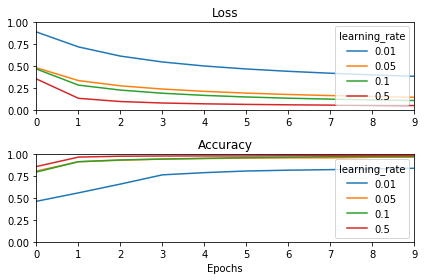

In [22]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [27]:
dflist = []

batch_sizes = [8, 16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [28]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [29]:
historydf

batch_size       8                   16                  32             \
metric           acc      loss       acc      loss       acc      loss   
0           0.519792  0.764131  0.490625  0.915742  0.469792  0.814548   
1           0.645833  0.650785  0.521875  0.792178  0.509375  0.768642   
2           0.692708  0.575849  0.550000  0.692670  0.537500  0.728055   
3           0.727083  0.520530  0.613542  0.614767  0.555208  0.692103   
4           0.765625  0.476771  0.669792  0.554951  0.581250  0.660070   
5           0.797917  0.440639  0.736458  0.508672  0.595833  0.631448   
6           0.820833  0.409985  0.802083  0.472283  0.609375  0.605707   
7           0.844792  0.383361  0.835417  0.442999  0.622917  0.582480   
8           0.854167  0.360101  0.852083  0.418809  0.643750  0.561396   
9           0.870833  0.339494  0.861458  0.398331  0.671875  0.542197   

batch_size       64                  128            
metric           acc      loss       acc      loss  
0           0.445833  0.990149  0.654167  0.580729  
1           0.451042  0.955841  0.660417  0.568539  
2           0.462500  0.922976  0.669792  0.556813  
3           0.464583  0.891698  0.683333  0.545455  
4           0.468750  0.861916  0.694792  0.534424  
5           0.477083  0.833591  0.705208  0.524017  
6           0.482292  0.806784  0.713542  0.513997  
7           0.489583  0.781377  0.728125  0.504254  
8           0.501042  0.757356  0.736458  0.494984  
9           0.518750  0.734669  0.743750  0.486035

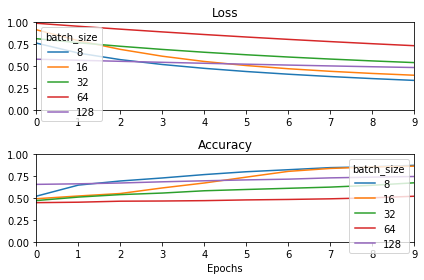

In [30]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [31]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [32]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [33]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

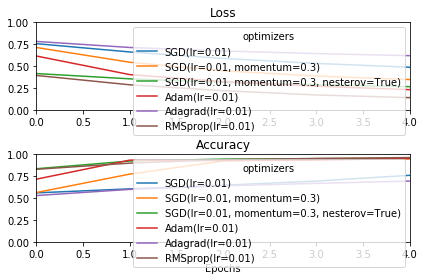

In [34]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()